# Non-linear equations

### Settings and importing

In [1]:
# Libraries installation
# !pip install numpy matplotlib seaborn
# !pip install tensorflow

In [2]:
# Graphing
from matplotlib import pyplot as plt
# Math
import numpy as np

### Solve

$f(x, \mu) = x ^ 2 - \mu$

$g(x, \mu) = \sin(x + \mu)$

$x \in [a, b]$, $\mu \in [\alpha, \beta]$

In [3]:
def f(x: float, mu: float) -> float:
    return x ** 2 - mu

def df(x: float, mu: float) -> float:
    return 2 * x

In [4]:
def g(x: float, mu: float) -> float:
    return np.sin(x) + mu

def dg(x: float, mu: float) -> float:
    return np.cos(x)

#### Median approximation

In [5]:
def is_solve(value: float, EPSILON: float=1e-3) -> bool:
    return abs(value) < EPSILON

In [6]:
def bin_search_zero_solve(
    function,
    a: float,
    b: float,
    mu: float,
    EPSILON: float=1e-3,
    iterator: int=1
) -> list[float, ] | None:
    if iterator > 100 or b - a < EPSILON:
        return
    iterator += 1

    left_solve = function(a, mu)
    c = (a + b) / 2
    mid_solve = function(c, mu)
    right_solve = function(b, mu)

    X = list()
    MU = list()
    
    if is_solve(left_solve, EPSILON):
        X += [a]
        MU += [mu]
    if is_solve(mid_solve, EPSILON):
        X += [c]
        MU += [mu]
    if is_solve(right_solve, EPSILON):
        X += [b]
        MU += [mu]

    if not any([is_solve(left_solve), is_solve(mid_solve), is_solve(right_solve)]):
        left_solves_fraction = bin_search_zero_solve(function, a, c, mu, EPSILON, iterator)
        right_solves_fraction = bin_search_zero_solve(function, c, b, mu, EPSILON, iterator)
        if left_solves_fraction is not None and \
             len(left_solves_fraction[0]) + len(left_solves_fraction[1]):
            X += left_solves_fraction[0]
            MU += left_solves_fraction[1]
        if right_solves_fraction is not None and \
              len(right_solves_fraction[0]) + len(right_solves_fraction[1]):
            X += right_solves_fraction[0]
            MU += right_solves_fraction[1]

    return [X, MU]

In [7]:
def get_zero_solves_by_median(
    function,
    a: float,
    b: float,
    alpha: float,
    beta: float,
    EPSILON: float=1e-4
) -> list[list[float, ], list[float, ]]:
    points = [[], []]

    for mu in np.arange(alpha, beta + EPSILON, EPSILON):
        solves = bin_search_zero_solve(function, a, b, mu, EPSILON)
        if len(solves[0]) + len(solves[1]):
            points[0] += solves[0]
            points[1] += solves[1]

    return points

1. $f(x, \mu) = x ^ 2 - \mu$

In [8]:
f_zero_solves_median = get_zero_solves_by_median(
    f,
    a=-2,
    b=2,
    alpha=0,
    beta=4,
    EPSILON=1e-2
)

2. $g(x, \mu) = \sin(x + \mu)$

In [9]:
g_zero_solves_median = get_zero_solves_by_median(
    g,
    a=-2,
    b=2,
    alpha=-3,
    beta=3,
    EPSILON=1e-2
)

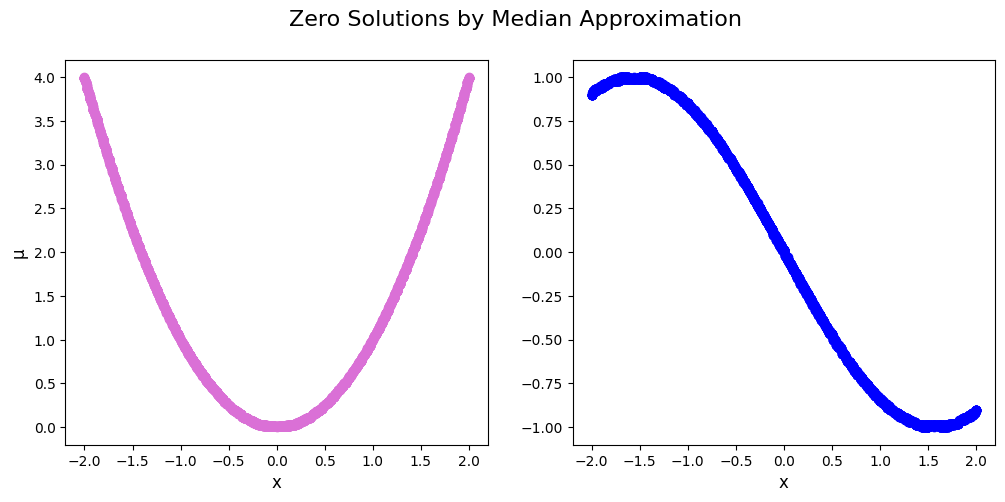

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(
    f_zero_solves_median[0],
    f_zero_solves_median[1],
    'o',
    color='orchid'
)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('µ', fontsize=12)

ax2.plot(
    g_zero_solves_median[0],
    g_zero_solves_median[1],
    'o',
    color='blue'
)
ax2.set_xlabel('x', fontsize=12)

fig.suptitle('Zero Solutions by Median Approximation', fontsize=16)
plt.show()

#### Newton's method

In [11]:
def newton_method_singl(
    func,
    dfunc,
    x0: float,
    mu: float,
    a,
    b,
    tol: float=1e-5,
    EPSILON: float=1e-3,
    max_iter: int=100
):
    x_n = x0
    for _ in range(max_iter):
        f_xn = func(x_n, mu)
        df_xn = dfunc(x_n, mu)

        if x_n < a or b < x_n:
            return None
        
        if abs(f_xn) < EPSILON:
            return x_n
        
        if df_xn == 0:
            return None
        
        x_n = x_n - f_xn / df_xn
    
    return None

In [12]:
def newton_method(
    func,
    dfunc,
    a: float,
    b: float,
    mu: float,
    EPSILON: float,
    tol=1e-5,
    max_iter=50
):
    roots = [[], []]
    x_min, x_max = a, b

    x = x_min
    while x <= x_max:
        root = newton_method_singl(func, dfunc, x, mu, a, b, tol, EPSILON, max_iter)
        
        if root is not None:
            if not any(abs(root - r) < EPSILON for r in roots[0]):
                roots[0].append(root)
                roots[1].append(mu)
        
        x += EPSILON
    
    return roots

In [13]:
def get_zero_solves_by_newton(
    function: float,
    d_function: float,
    a: float,
    b: float,
    alpha: float,
    beta: float,
    EPSILON: float=1e-3
):
    roots = [[], []]
    for mu in np.arange(alpha, beta + EPSILON, EPSILON):
        solves = newton_method(function, d_function, a, b, mu, EPSILON)
        if solves is not None and len(solves[0]) + len(solves[1]):
            roots[0] += solves[0]
            roots[1] += solves[1]

    return roots


$x \in [a, b]$, $\mu \in [\alpha, \beta]$

1. $f(x, \mu) = x ^ 2 - \mu$

In [14]:
f_zero_solves_newton = get_zero_solves_by_newton(
    function=f,
    d_function=df,
    a=-2,
    b=2,
    alpha=0,
    beta=4,
    EPSILON=1e-2
)

2. $g(x, \mu) = \sin(x + \mu)$

In [15]:
g_zero_solves_newton = get_zero_solves_by_newton(
    function=g,
    d_function=dg,
    a=-2,
    b=2,
    alpha=-3,
    beta=3,
    EPSILON=1e-2
)

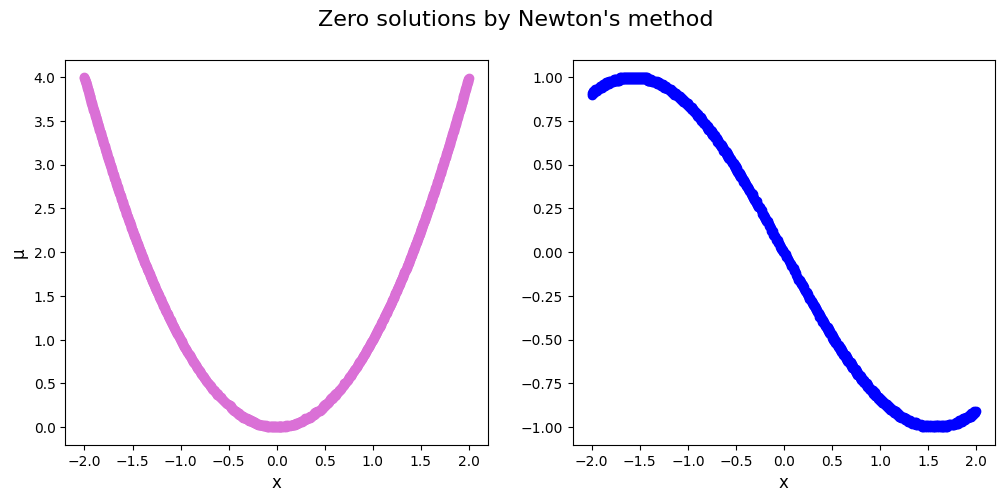

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(
    f_zero_solves_newton[0],
    f_zero_solves_newton[1],
    'o',
    color='orchid'
)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('µ', fontsize=12)

ax2.plot(
    g_zero_solves_newton[0],
    g_zero_solves_newton[1],
    'o',
    color='blue'
)
ax2.set_xlabel('x', fontsize=12)

fig.suptitle("Zero solutions by Newton's method", fontsize=16)
plt.show()